In [1]:
# Linear regression on Bitcoin dataset

__author__ = 'DonP'


In [2]:
# Importing core libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

np.random.seed(42)


In [3]:
# Importing dataset
df = pd.read_csv(r'coindesk-bpi-USD-close_data-2010-07-17_2018-08-01.csv')


In [4]:
# Simple numeric encoding of 'Date' variable
df['Date'] = np.arange(len(df['Date']))
print(df['Date'].head(), df['Date'].tail())


(0    0
 1    1
 2    2
 3    3
 4    4
 Name: Date, dtype: int64, 2933    2933
 2934    2934
 2935    2935
 2936    2936
 2937    2937
 Name: Date, dtype: int64)

In [6]:
# Features and labels
X = df['Date'].values
y = df['Close Price'].values


In [10]:
# Splitting into training and testing sets
#No validation set because of small amount of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


In [11]:
# Defining model
#No feature selection nesscessary (there's barely one feature) so Ridge > Lasso
from sklearn.linear_model import Ridge
regressor = Ridge(solver='cholesky', random_state=42)


In [14]:
# Find best param w/ grid search
from sklearn.model_selection import GridSearchCV
params = [{'alpha': np.arange(1001)}]
grid_search = GridSearchCV(regressor, scoring='neg_mean_squared_error', param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))


{'alpha': 1000} 2229.421688782799


In [16]:
# Fitting regressor w/ best param to data
regressor = Ridge(solver='cholesky', alpha=1000, random_state=42)
regressor.fit(X_train, y_train)


Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

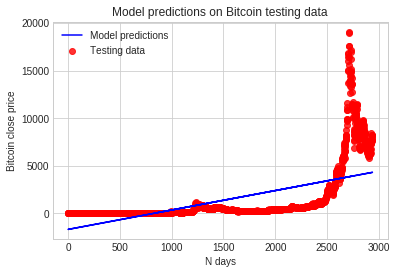

In [20]:
# Visualizing training set results
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_train, y_train, c='r', alpha=0.8, label='Testing data')
ax.plot(X_train, regressor.predict(X_train), c='b', label='Model predictions')
ax.set_title('Model predictions on Bitcoin testing data')
ax.set_xlabel('N days')
ax.set_ylabel('Bitcoin close price')
ax.legend()
plt.show()


In [ ]:
#Model is underfitting to the data. Linear model == unable to accurately model curves in the data.